# BERT Base - Augmented Data - All Data

In [ ]:
import random
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!pip install -q tensorflow==2.8.0

import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 KB 15.3 MB/s eta 0:00:00
2.8.0


In [ ]:
!pip install -q transformers==4.18.0

import transformers
print(transformers.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 KB 59.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 103.4 MB/s eta 0:00:00
4.18.0


# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba18 - Testing All Dataset

/content/drive/MyDrive/Thesis/Code/GenerativeDataAugmentation/Coba18 - Testing All Dataset


In [ ]:
!ls

'augJoin - AllDataset - filtered.csv'
'augJoin - AllDataset - unfiltered.csv'
'BERT - All Dataset - base.ipynb'
'BERT - All Dataset - filtered.ipynb'
'BERT - All Dataset - unfiltered.ipynb'
'Copy of BiLSTM - GoEmotion - base.ipynb'
'Copy of BiLSTM - GoEmotion - filtered.ipynb'
'Copy of BiLSTM - GoEmotion - unfiltered.ipynb'
'Copy of LSTM - GoEmotion - base.ipynb'
'Copy of LSTM - GoEmotion - filtered.ipynb'
'Copy of LSTM - GoEmotion - unfiltered.ipynb'
 dataset.csv
'RoBERTa - All Dataset - base.ipynb'
'RoBERTa - All Dataset - filtered.ipynb'
'RoBERTa - All Dataset - unfiltered.ipynb'


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

dataset = pd.read_csv("augJoin - AllDataset - unfiltered.csv", index_col=0, encoding="utf-8")
dataset

,Text,Emotion
0,i am feeling ungrateful all the time,sadness
1,i am not feeling like ive missed anything,sadness
2,"But why will it ""activate""??? Will this make m...",sadness
3,i didn t mind going but as i neared the end of...,sadness
4,i wish i could do this but unfortunately i fee...,sadness
...,...,...
65023,I love truck drivers!!,love
65024,I knew I'd see him here eventually. I really l...,joy
65025,Nope what’s it about?,surprise
65026,Removed and warned. R1,anger


In [ ]:
dataset = dataset.rename({'Text':'text', 'Emotion': 'emotion'}, axis=1)  # new method

In [ ]:
dataset

,text,emotion
0,i am feeling ungrateful all the time,sadness
1,i am not feeling like ive missed anything,sadness
2,"But why will it ""activate""??? Will this make m...",sadness
3,i didn t mind going but as i neared the end of...,sadness
4,i wish i could do this but unfortunately i fee...,sadness
...,...,...
65023,I love truck drivers!!,love
65024,I knew I'd see him here eventually. I really l...,joy
65025,Nope what’s it about?,surprise
65026,Removed and warned. R1,anger


In [ ]:
dataset = dataset.dropna().reset_index(drop=True)

In [ ]:
dataset

,text,emotion
0,i am feeling ungrateful all the time,sadness
1,i am not feeling like ive missed anything,sadness
2,"But why will it ""activate""??? Will this make m...",sadness
3,i didn t mind going but as i neared the end of...,sadness
4,i wish i could do this but unfortunately i fee...,sadness
...,...,...
93182,I love truck drivers!!,love
93183,I knew I'd see him here eventually. I really l...,joy
93184,Nope what’s it about?,surprise
93185,Removed and warned. R1,anger


In [ ]:
dataset['emotion'].value_counts().sort_index()

anger       13940
disgust     13037
fear        13870
joy         14744
love         9832
sadness     14480
surprise    13284
Name: emotion, dtype: int64

In [ ]:
dataset = dataset[dataset.emotion != 'love']

In [ ]:
dataset['emotion'].value_counts().sort_index()

anger       13940
disgust     13037
fear        13870
joy         14744
sadness     14480
surprise    13284
Name: emotion, dtype: int64

# Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dataset['emotion_encode'] = le.fit_transform(dataset['emotion'])
dataset.head()

,text,emotion,emotion_encode
0,i am feeling ungrateful all the time,sadness,4
1,i am not feeling like ive missed anything,sadness,4
2,"But why will it ""activate""??? Will this make m...",sadness,4
3,i didn t mind going but as i neared the end of...,sadness,4
4,i wish i could do this but unfortunately i fee...,sadness,4


In [ ]:
le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_mapping)

{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'sadness': 4, 'surprise': 5}


In [ ]:
LABEL_NAME = le.classes_
print(LABEL_NAME)

['anger' 'disgust' 'fear' 'joy' 'sadness' 'surprise']


In [ ]:
emotion_col = dataset.pop("emotion")
emotion_col

0         sadness
1         sadness
2         sadness
3         sadness
4         sadness
           ...   
93181       anger
93183         joy
93184    surprise
93185       anger
93186       anger
Name: emotion, Length: 83355, dtype: object

In [ ]:
dataset

,text,emotion_encode
0,i am feeling ungrateful all the time,4
1,i am not feeling like ive missed anything,4
2,"But why will it ""activate""??? Will this make m...",4
3,i didn t mind going but as i neared the end of...,4
4,i wish i could do this but unfortunately i fee...,4
...,...,...
93181,I had smoothies in the past with these packets...,0
93183,I knew I'd see him here eventually. I really l...,3
93184,Nope what’s it about?,5
93185,Removed and warned. R1,0


# Train, Test, Validation Data Splitting

In [ ]:
import numpy as np

train_data, val_data, test_data = np.split(dataset.sample(frac=1), [int(.8*len(dataset)), int(.9*len(dataset))])

In [ ]:
train_data = train_data.reset_index().drop(['index'], axis=1)

In [ ]:
train_data['emotion_encode'].value_counts()

3    11841
4    11573
2    11155
0    11082
5    10619
1    10414
Name: emotion_encode, dtype: int64

In [ ]:
test_data = test_data.reset_index().drop(['index'], axis=1)

In [ ]:
test_data['emotion_encode'].value_counts()

4    1481
0    1418
3    1415
2    1376
5    1365
1    1281
Name: emotion_encode, dtype: int64

In [ ]:
val_data = val_data.reset_index().drop(['index'], axis=1)

In [ ]:
val_data['emotion_encode'].value_counts()

3    1488
0    1440
4    1426
1    1342
2    1339
5    1300
Name: emotion_encode, dtype: int64

In [ ]:
train_data.shape, test_data.shape, val_data.shape

((66684, 2), (8336, 2), (8335, 2))

# Model 

In [ ]:
# Tentukan pre-trained model yang akan digunakan untuk fine-tuning
# Daftar model dapat ditemukan pada https://huggingface.co

PRE_TRAINED_MODEL = 'roberta-base'

In [ ]:
from transformers import RobertaTokenizer

bert_tokenizer = RobertaTokenizer.from_pretrained(PRE_TRAINED_MODEL)  # Load tokenizer dari pre-trained model

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

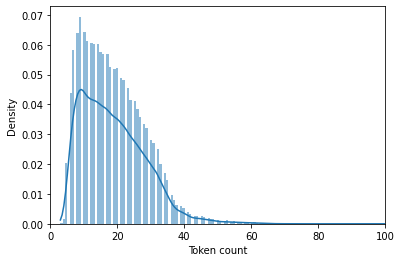

In [ ]:
'''
Ada banyak cara untuk menentukan max_length
Intuisinya adalah kita tidak ingin memotong kalimat, atau terlalu banyak menambahkan padding (komputasi lebih lama)
Contoh ini, max_lenght ditentukan dari distribusi token pada dataset 
'''
token_lens = []

for txt in train_data.text:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0, 100]);
plt.xlabel('Token count');

In [ ]:
# Dapat dilihat dari grafik diatas, sebagian besar kalimat tampaknya berisi kurang dari 80 token
# Maka, tentukan max_length adalah 80

MAX_LEN = 80

In [ ]:
# Buat fungsi untuk menggabungkan langkah tokenisasi, menambahkan special tokens untuk keseluruhan data sebagai input formatting ke model BERT
def convert_example_to_feature(sentence):  
  return bert_tokenizer.encode_plus(
      sentence, 
      add_special_tokens = True, 
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN, 
      return_attention_mask = True, 
      return_token_type_ids=True
    )

In [ ]:
# Buat fungsi untuk memetakan input hasil input formatting agar sesuai dengan model BERT
def map_example_to_dict(input_ids, attention_masks, token_type_ids, label):
  return {
      "input_ids": input_ids,               # Sebagai token embedding
      "token_type_ids": token_type_ids,     # Sebagai segment embedding
      "attention_mask": attention_masks,    # Sebagai filter informasi mana yang kalkulasi oleh model
  }, label

In [ ]:
# Buat fungsi untuk iterasi pada setiap kalimat pada keseluruhan data
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []
    
  for sentence, label in data.to_numpy():

    bert_input = convert_example_to_feature(sentence)
  
    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
# Tentukan nilai hyperparamter untuk fine-tuning
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 1e-5

In [ ]:
# Lakukan input formatting menggunakan fungsi sebelumnya pada data keseluruhan data
train_encoded = encode(train_data).batch(BATCH_SIZE)
test_encoded = encode(test_data).batch(BATCH_SIZE)
val_encoded = encode(val_data).batch(BATCH_SIZE)

In [ ]:
'''
BERT untuk tugas klasifikasi sequence (teks) dengan menambahkan linear layer di atas pooled output untuk pengklasifikasi
https://huggingface.co/docs/transformers/model_doc/bert#transformers.TFBertForSequenceClassification
'''

from transformers import TFRobertaForSequenceClassification

# Load model
bert_model = TFRobertaForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=7)

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tentukan optimizer dengan learning rate tertentu
# Paper aslinya menggunakan Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

# Karena tidak menggunakan one-hot vectors, sehingga loss function dapat menggunakan sparse categorical cross entropy
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

# Compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%%time
bert_history = bert_model.fit(train_encoded, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encoded)

Epoch 1/5
2084/2084 [==============================] - 1103s 519ms/step - loss: 0.8501 - accuracy: 0.6909 - val_loss: 0.7170 - val_accuracy: 0.7409
Epoch 2/5
2084/2084 [==============================] - 1080s 518ms/step - loss: 0.6645 - accuracy: 0.7576 - val_loss: 0.6901 - val_accuracy: 0.7536
Epoch 3/5
2084/2084 [==============================] - 1080s 518ms/step - loss: 0.6078 - accuracy: 0.7773 - val_loss: 0.6897 - val_accuracy: 0.7509
Epoch 4/5
2084/2084 [==============================] - 1082s 519ms/step - loss: 0.5556 - accuracy: 0.7949 - val_loss: 0.7036 - val_accuracy: 0.7499
Epoch 5/5
2084/2084 [==============================] - 1081s 519ms/step - loss: 0.5086 - accuracy: 0.8124 - val_loss: 0.7329 - val_accuracy: 0.7477
CPU times: user 59min 45s, sys: 10min 59s, total: 1h 10min 44s
Wall time: 1h 30min 48s


In [ ]:
# Buat fungsi untuk plotting hasil training
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

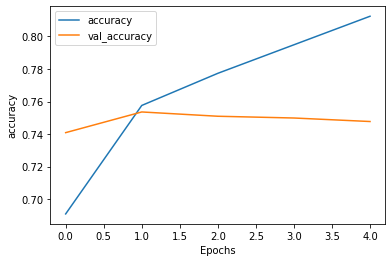

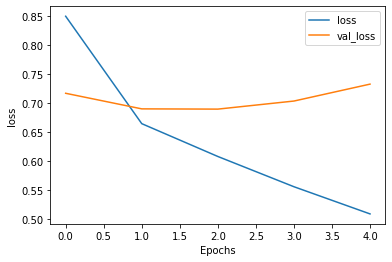

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss')
for i in range(EPOCHS):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, bert_history.history['accuracy'][i], bert_history.history['loss'][i], bert_history.history['val_accuracy'][i], bert_history.history['val_loss'][i]))


Epoch No.  Train Accuracy  Train Loss      Val Accuracy    Val Loss
       1   0.690870 	   0.850128 	   0.740852 	   0.717031
       2   0.757573 	   0.664546 	   0.753569 	   0.690104
       3   0.777338 	   0.607835 	   0.750930 	   0.689671
       4   0.794883 	   0.555588 	   0.749850 	   0.703619
       5   0.812429 	   0.508614 	   0.747690 	   0.732864


In [ ]:
score = bert_model.evaluate(test_encoded)

print("Test Accuracy:", score[1])

261/261 [==============================] - 44s 167ms/step - loss: 0.7323 - accuracy: 0.7468
Test Accuracy: 0.7467610239982605


In [ ]:
predicted_raw = bert_model.predict(test_encoded)

In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(test_data['emotion_encode'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.7467610364683301

In [ ]:
confusion_matrix(y_true, y_pred)

array([[ 894,  327,   33,   30,   83,   51],
       [ 254,  743,   45,   28,  110,  101],
       [  30,   64, 1185,   14,   54,   29],
       [  42,   27,    7, 1229,   34,   76],
       [ 101,   92,   26,   33, 1192,   37],
       [  65,  142,   32,   99,   45,  982]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1418
           1       0.53      0.58      0.56      1281
           2       0.89      0.86      0.88      1376
           3       0.86      0.87      0.86      1415
           4       0.79      0.80      0.79      1481
           5       0.77      0.72      0.74      1365

    accuracy                           0.75      8336
   macro avg       0.75      0.74      0.75      8336
weighted avg       0.75      0.75      0.75      8336

